#### Word2Vec
Word2vec is a two-layer neural network that processes text. Its input is a text corpus and its output is a set of vectors, feature vectors for words in that corpus. Word2vec is not a deep neural network, it turns text into a numerical form that deep nets can understand.

In [1]:
# Import All Need Library
import pandas as pd
import nltk
import gensim
from gensim import corpora, models, similarities

In [2]:
#load the data
df=pd.read_csv('jokes.csv')

In [3]:
df.head()

,ID,Question,Answer
0,1,Did you hear about the Native American man tha...,He nearly drown in his own tea pee.
1,2,What's the best anti diarrheal prescription?,Mycheexarphlexin
2,3,What do you call a person who is outside a doo...,Matt
3,4,Which Star Trek character is a member of the m...,Jean-Luc Pickacard
4,5,What's the difference between a bullet and a h...,A bullet doesn't miss Harambe


In [4]:
x=df['Question'].values.tolist()

In [5]:
y=df['Answer'].values.tolist()

In [6]:
All= x+y

In [7]:
# Tokenize from sentence
tok_All= [nltk.word_tokenize(i) for i in All]

In [8]:
# Train Model
model = gensim.models.Word2Vec(tok_All, min_count=1, size=32)

In [9]:
# Find most similar word
model.most_similar('you')

/home/surya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('You', 0.8349322080612183),
 ('someone', 0.8263548612594604),
 ('cow', 0.8148015737533569),
 ('girl', 0.8107972741127014),
 ('hillbillly', 0.8077986240386963),
 ('midget', 0.7832127809524536),
 ('bitchy', 0.7788679599761963),
 ('we', 0.7739318013191223),
 ('screwing', 0.7708837389945984),
 ('woman', 0.7677273750305176)]

In [10]:
# Summarize vocabulary
words = list(model.wv.vocab)

In [11]:
# fit a PCA model to the vectors
X = model[model.wv.vocab]

/home/surya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


#### Visualize Word Embedding

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=2)

In [14]:
result = pca.fit_transform(X)

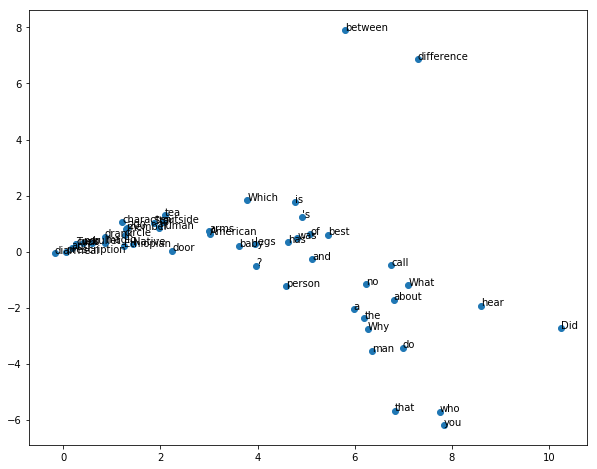

In [15]:
#create a scatter plot of the projection
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.scatter(result[:50, 0], result[:50, 1])
a = 0
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    a+=1
    if a==50:
        break
plt.show()

#### Save Model

In [16]:
model.save('Jokes_model.bin')